## Plotly Graph Objects

The main differences between Plotly Express and Graph Objects are:

* Plotly Express is designed for long form data (where trace categories are held within a column), whereas Graph Objects works best on wide form data (where trace categories are held across columns). 

* Graph Objects is fully customisable, and allows for very advanced visualisations, Plotly express is designed to create quick visualisations at the expense of customisation

* In Express the entire dataframe is passed to the function, traces are then selected, whereas in Graph Objects each trace is passed separately 

* Graph Objects requires you to create a Figure, and then apply the traces onto the Figure, Express handles this for you

![alt text](pictures/wideform_longform.png "Difference between long and wide form data")

We will again begin by importing our libraries, for this we will need Pandas and the Plotly Graph Objects library.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

We are going to be looking at emergency department attendance and admissions data from NHS England, for ease you can find the .csv file in data folder. We can use the Pandas read_csv function to import this in.

In [2]:
df = pd.read_csv('data/ae_data.csv')

It is good practice to check out the dataframe to ensure it's imported in the correct format by calling the variable that we assigned it to "df".

In [3]:
df

month  ae_type_1  ae_type_2  ae_type_3  \
0    01/08/2010    1138652      54371     559358   
1    01/09/2010    1150728      55181     550359   
2    01/10/2010    1163143      54961     583244   
3    01/11/2010    1111295      53727     486005   
4    01/12/2010    1159204      45536     533001   
..          ...        ...        ...        ...   
159  01/11/2023    1385701      42365     734056   
160  01/12/2023    1383876      39282     756074   
161  01/01/2024    1397645      42835     784555   
162  01/02/2024    1347297      43868     761196   
163  01/03/2024    1462477      48922     840714   

     emergency_admissions_via_type_1  emergency_admissions_via_type_2  \
0                             287438                             5367   
1                             293991                             5543   
2                             303452                             5485   
3                             297832                             5731   
4                             318602                             6277   
..                               ...                              ...   
159                           396755                             1452   
160                           406833                             1327   
161                           403210                             1399   
162                           382133                             1465   
163                           419826                             1515   

     emergency_admissions_via_type_3_and_4  other_emergency_admissions  \
0                                     8081                      124816   
1                                     3673                      121693   
2                                     2560                      124718   
3                                     3279                      122257   
4                                     3198                      124651   
..                                     ...                         ...   
159                                   4319                      143110   
160                                   4164                      134787   
161                                   4561                      147088   
162                                   4231                      139515   
163                                   4614                      141219   

     four_hour_breaches twelve_hour_breaches  
0                  3697                    1  
1                  5907                       
2                  6932                       
3                  7179                    2  
4                 13818                   15  
..                  ...                  ...  
159              146272                42854  
160              148282                44045  
161              158721                54308  
162              139458                44417  
163              140181                42968  

[164 rows x 10 columns]

We can check to make sure the formats are correct with the .info function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   month                                  164 non-null    object
 1   ae_type_1                              164 non-null    int64 
 2   ae_type_2                              164 non-null    int64 
 3   ae_type_3                              164 non-null    int64 
 4   emergency_admissions_via_type_1        164 non-null    int64 
 5   emergency_admissions_via_type_2        164 non-null    int64 
 6   emergency_admissions_via_type_3_and_4  164 non-null    int64 
 7   other_emergency_admissions             164 non-null    int64 
 8   four_hour_breaches                     164 non-null    int64 
 9   twelve_hour_breaches                   164 non-null    object
dtypes: int64(8), object(2)
memory usage: 12.9+ KB


Before we start working on any data with datetime fields we need to make sure it is in the format that we want. A common issue when graphing is that the date is set to American format (month first) whereas we want it in the UK format (day first). To make sure it's formatted correctly we can use the pandas function to_datetime. 

In [5]:
df['month'] = pd.to_datetime(df['month'], dayfirst=True)

### Basic syntax

Graph Objects requires us to first render a figure, this is a blank template in which we can start to build (by layering) our graph.

In [6]:
fig = go.Figure()

If we call this, we can see that it is a blank graph

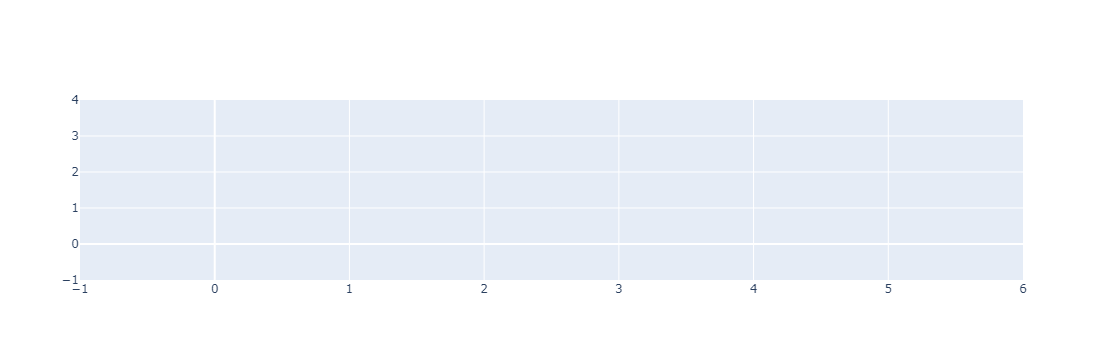

In [7]:
fig.show()

Unlike the Express library, we use **Traces** to add lines to the graph (the Figure), each measure from our dataframe is added as a separate trace. For example, if we want to create a line chart, first we need to add a trace, and then we need to use the Scatter sub library to create a line chart.

Lets breakdown how the add trace function works;

![alt text](pictures/adding_traces.png "Adding Traces - Breaking down the function")

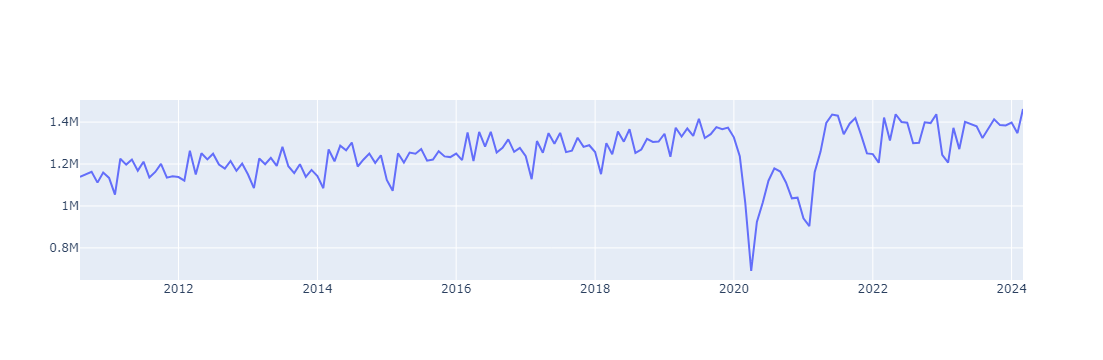

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['month'], y=df['ae_type_1']))

fig.show()

If we want to add a subsequent line we call the add trace argument again.

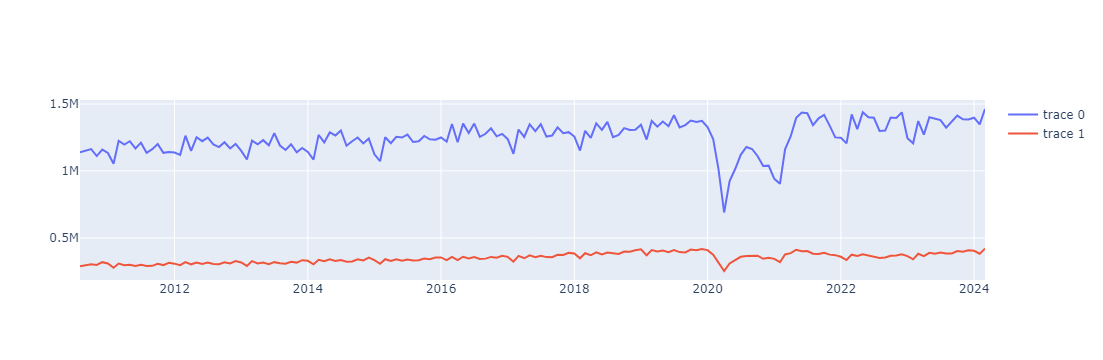

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['month'], y=df['ae_type_1']))

fig.add_trace(go.Scatter(x=df['month'], y=df['emergency_admissions_via_type_1']))

fig.show()

**Activity:**

**Beginner**:<br>Create a line chart using the type 2 categories in the dataframe (there should be two traces).

**Advanced**: <br> Create a line chart using a **for** loop on any three columns in the dataframe.


In [10]:
# Your code here











### Customising the Traces

Because we are calling the traces individually, it means we can customise each trace individually, this is where the customisation of graph objects comes in. For example to name our traces we can use:

**Naming Traces**

We can individually name our traces by using the name parameter in the type of trace function.

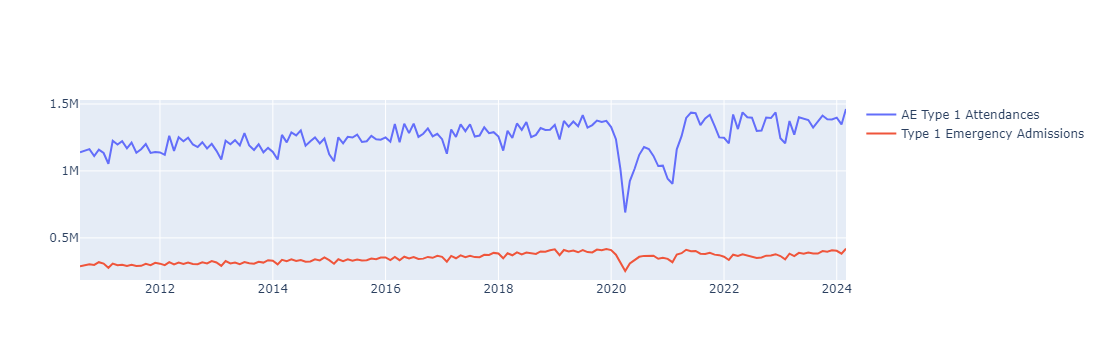

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['month'], y=df['ae_type_1'], name='AE Type 1 Attendances'))

fig.add_trace(go.Scatter(x=df['month'], y=df['emergency_admissions_via_type_1'], name='Type 1 Emergency Admissions'))

fig.show()

**Colours**

To change the colour of the traces we can use the line_color parameter, there are three options to choose from when selecting colours. 

* **Static colours** are the literal name of the colour, for example 'blue'. While easy to understand this way of assigning colours is very limited and only really useful if you want either a white or black item.

* **Hex codes** begin with a # and are followed by a blend of 6 numbers or letters: For example a blue colour code would look like #0080ff. You can add two additional characters to define the opacity. 

* **RGB codes** define the red, green and blue required to create the colour, you can also specify the transparency in the fourth slot. The same colour above in RGB would be rgb(0, 128, 255) I could then make this have 50% opacity using rgb(0, 128, 255, .5)

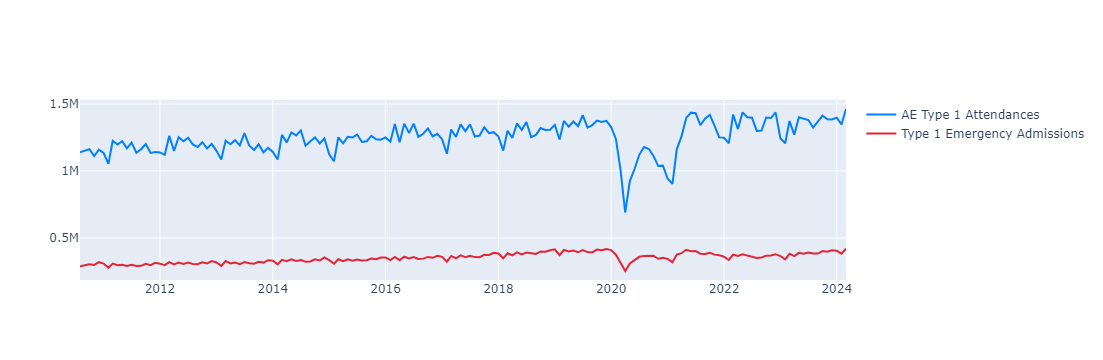

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_1'], 
                         name='AE Type 1 Attendances', 
                         line_color='#0080ff')
              )

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['emergency_admissions_via_type_1'], 
                         name='Type 1 Emergency Admissions', 
                         line_color='#e32636')
              )

fig.show()

**Line Patterns**

There are two ways that we can edit the line patterns.

Using the Mode parameter like this.

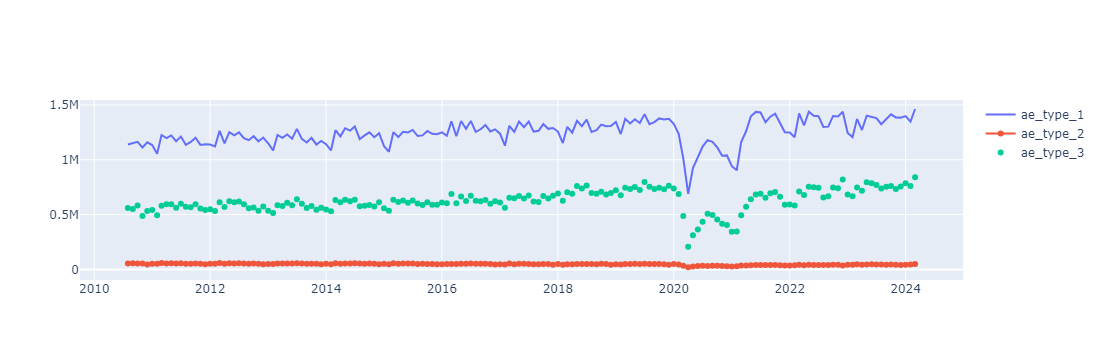

In [13]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['month'], y=df['ae_type_1'],
                         mode='lines', # mode: to change the line pattern
                         name='ae_type_1'))
fig.add_trace(go.Scatter(x=df['month'], y=df['ae_type_2'],
                         mode='lines+markers', # mode: to change the line pattern
                         name='ae_type_2'))
fig.add_trace(go.Scatter(x=df['month'], y=df['ae_type_3'],
                         mode='markers',  # mode: to change the line pattern
                         name='ae_type_3'))

fig.show()

or using the line parameter.

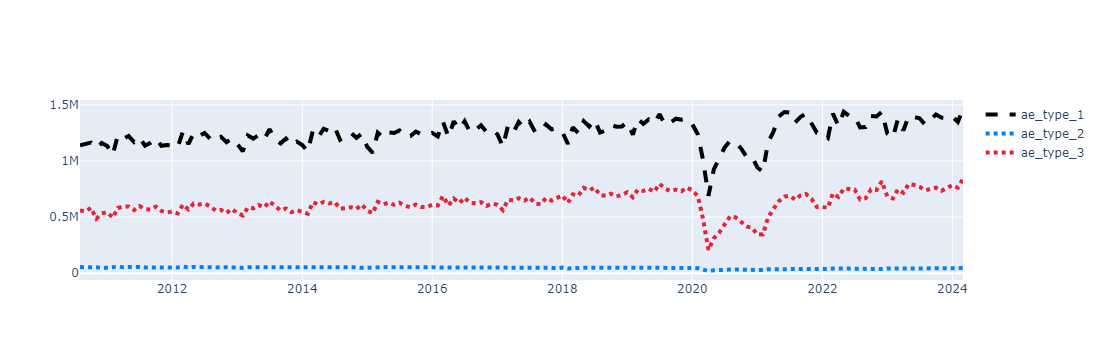

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_1'], 
                         name='ae_type_1',
                         line = dict(color='black', # line: Use the dictionary to change the line pattern
                                     width=4, 
                                     dash='dash')
                         )
              )

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_2'], 
                         name='ae_type_2',
                         line = dict(color='#0080ff', # line: Use the dictionary to change the line pattern
                                     width=4, 
                                     dash='dot')
                         )
              )

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_3'], 
                         name='ae_type_3',
                         line=dict(color='#e32636', # line: Use the dictionary to change the line pattern
                                   width=4, 
                                   dash='dot')
                         )
              )

fig.show()

### Adding Titles

Remember, the update layout functions (`fig.update_layout`) all work with Graph Objects too! <br>
So, let's add a title and set the font.

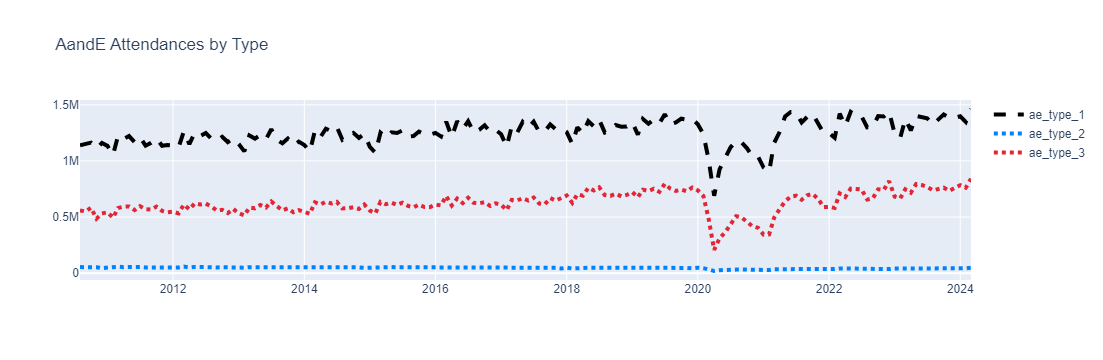

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_1'], 
                         name='ae_type_1',
                         line = dict(color='black', 
                                     width=4, 
                                     dash='dash')
                         )
              )

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_2'], 
                         name='ae_type_2',
                         line = dict(color='#0080ff', 
                                     width=4, 
                                     dash='dot')
                         )
              )

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_3'], 
                         name='ae_type_3',
                         line=dict(color='#e32636', 
                                   width=4, 
                                   dash='dot')
                         )
              )

fig.update_layout(title='AandE Attendances by Type',
                  font=dict(family='Arial, monospace'),
              )

fig.show()

**Activity**

**Beginner**: Create a Line chart using any three columns from the dataframe, include: <br>
    - Colour Coding <br>
    - Named traces <br>
    - Chart titles (including axis) <br>
    - Margins reduced <br>
    - Include a legend <br>
    

**Advanced**: Create the above as an Area chart (you will need to use the plotly graphing documentation here: [https://plotly.com/python/](https://plotly.com/python/)

In [16]:
# Your code here











### Using Loops

We have already seen that multiple traces can be added by adding more instances of `fig.add_trace`. <br>
Another approach to this is to create a loop that will add the multiple traces.

We can use a list of the trace names to do this.

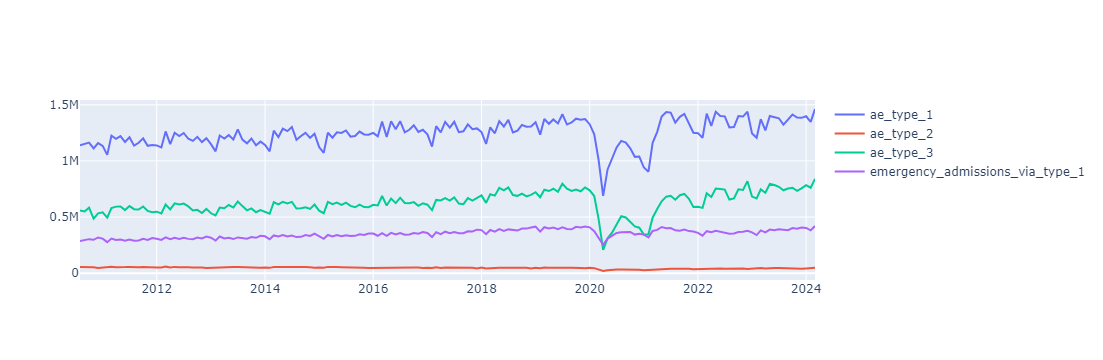

In [17]:
fig = go.Figure()

for i in ['ae_type_1', 'ae_type_2', 'ae_type_3', 'emergency_admissions_via_type_1']:

    fig.add_trace(go.Scatter(x=df['month'], y=df[i], name=i))

fig.show()

### Nested Loops used with example of Area plots

Area plots can easily be created by adding a parameter of `fill` to the trace type `go.Scatter` plot. <br>
There are different `fill` options available:

In [18]:
# read these as: 'to self', 'to next y', and 'to zero y'. 
fill_options = ['toself','tonexty','tozeroy']

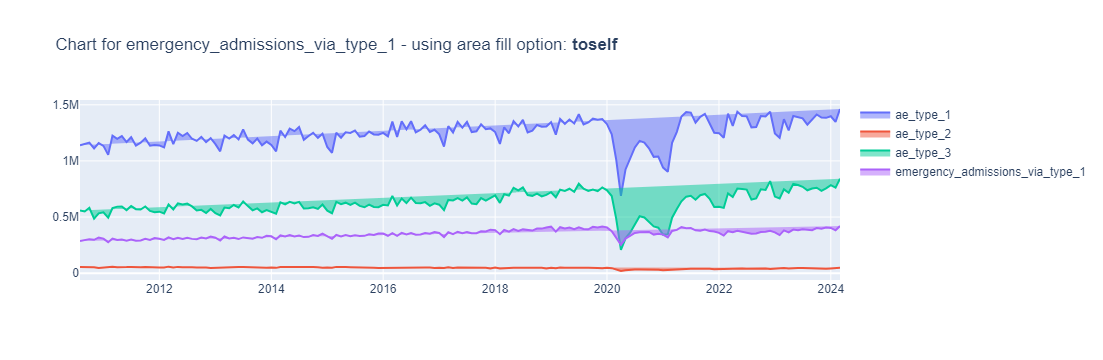

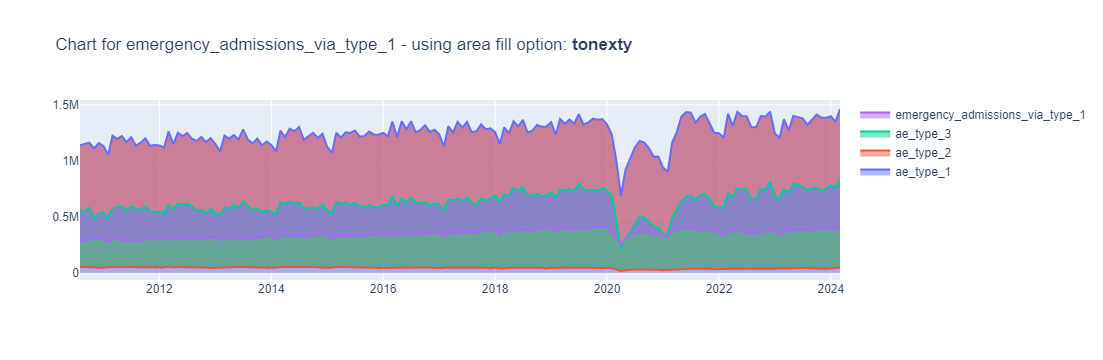

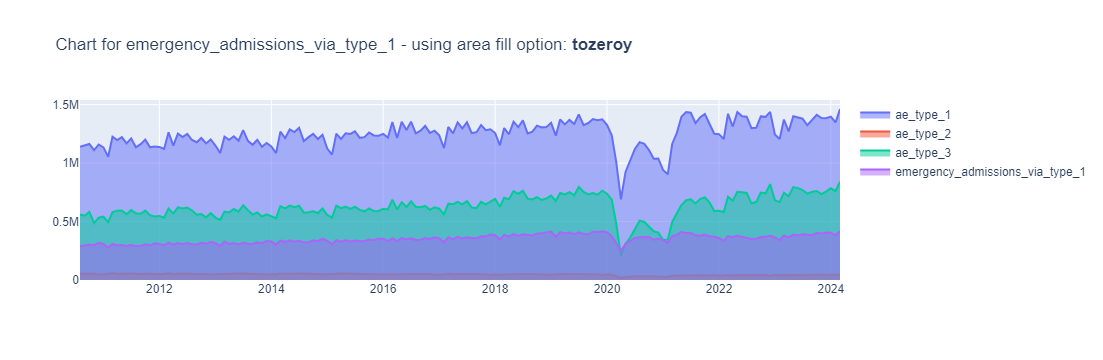

In [19]:
for option in fill_options:
    fig = go.Figure()
    
    for i in ['ae_type_1', 'ae_type_2', 'ae_type_3', 'emergency_admissions_via_type_1']:

        fig.add_trace(go.Scatter(x=df['month'], 
                                 y=df[i], 
                                 fill=option, # fill added to change to an Area plot
                                 name=i))
        
        fig.update_layout(title='Chart for '+ i + ' - using area fill option: <b>' + option +'</b>' ,
                  font=dict(family='Arial, monospace'),
                  )


    fig.show()

### Subplots

> Figure: refers to the entire graphical representation that contains one or more plots, charts, graphs, or other visual elements.
Figures often consist of multiple subplots arranged in a grid or other configurations to display different aspects of the data or to compare multiple datasets.

>  Plot: is a specific type of visual representation within a figure that displays data points or statistical summaries in a graphical format.
Each plot typically consists of axes, along with markers, lines, bars, or other graphical elements that represent the data.

Sometimes it might be better to show traces on their own independent charts within a figure. <br>
Subplots can be used to divide a figure into sections each having its own chart. For this we have to import `make_subplots` from the `plotly.subplots` library.

```python
from plotly.subplots import make_subplots
```

We are going to use the four traces from the last example. So firstly, we need to set up the subplot grid of 2 rows and 2 columns.

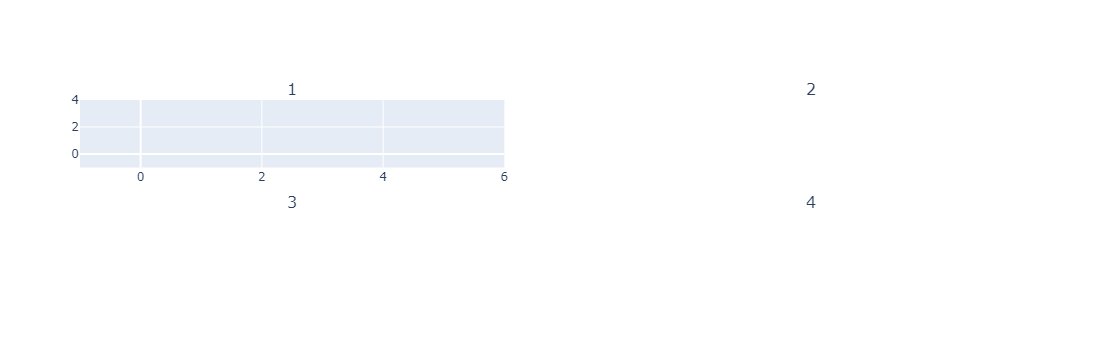

In [20]:
# Create subplots: 2 rows and 2 columns with titles
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['1', '2', '3', '4'])

fig.show()

Now we can add our traces the same as we have previously, each with an additional parameter of referencing the `row` and `column` of where to be placed in the subplot grid.

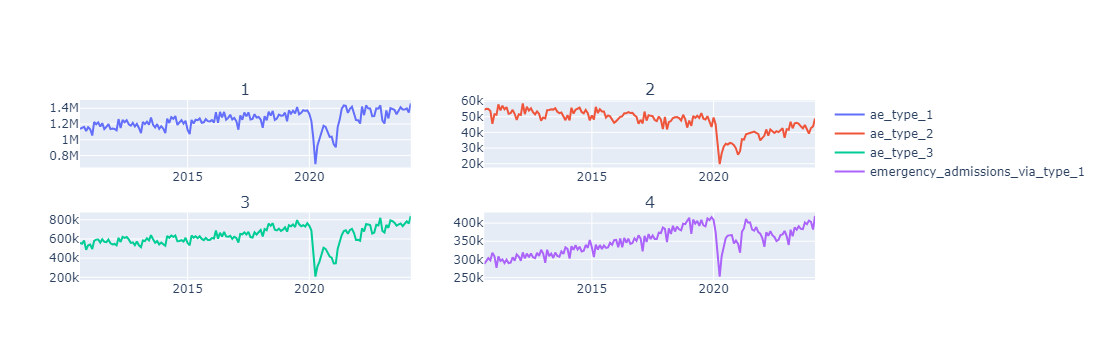

In [21]:
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['1', '2', '3', '4'])

# Add traces to the respective subplots
fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_1'], 
                         name='ae_type_1'), 
                         row=1, col=1) # position 1

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_2'], 
                         name='ae_type_2'), 
                         row=1, col=2) # position 2

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_3'], 
                         name='ae_type_3'), 
                         row=2, col=1) # position 3

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['emergency_admissions_via_type_1'], 
                         name='emergency_admissions_via_type_1'), 
                         row=2, col=2) # position 4


fig.show()

The proper subplots titles can be added, and using `fig.update_layout` the usual layout options can also be applied. <br>
Setting the y-axis to zero is also important here as each plot is currently displaying a different scale, which could be misleading when comparing the plots.

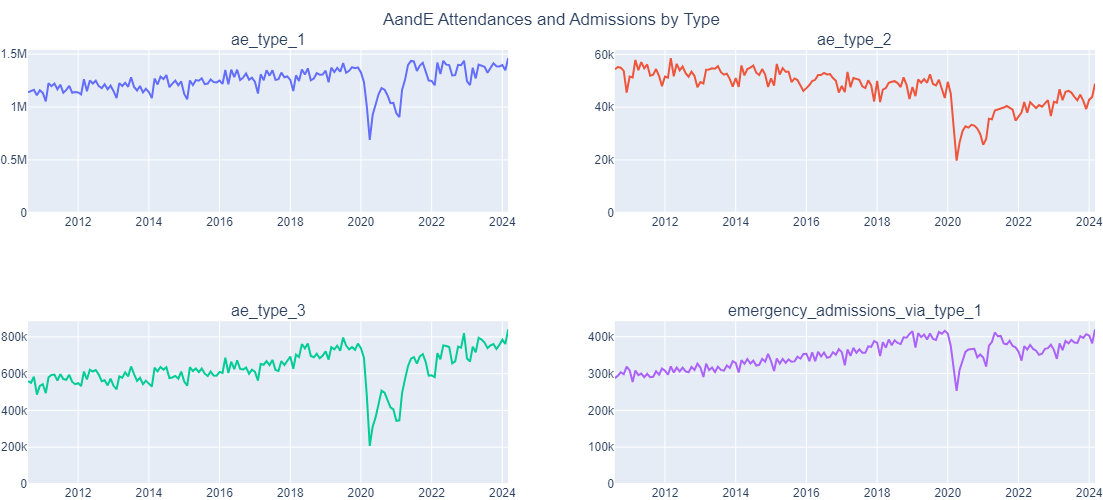

In [22]:
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['ae_type_1', # proper subplot title as a list to match the trace positions
                                    'ae_type_2', 
                                    'ae_type_3', 
                                    'emergency_admissions_via_type_1'])

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_1'], 
                         name='ae_type_1'), 
                         row=1, col=1) 

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_2'], 
                         name='ae_type_2'), 
                         row=1, col=2) 

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['ae_type_3'], 
                         name='ae_type_3'), 
                         row=2, col=1) 

fig.add_trace(go.Scatter(x=df['month'], 
                         y=df['emergency_admissions_via_type_1'], 
                         name='emergency_admissions_via_type_1'), 
                         row=2, col=2)

fig.update_layout(title='AandE Attendances and Admissions by Type', # layout preferences
                  title_x=0.5,  # Center the title horizontally
                  font=dict(family='Arial, monospace'),
                  showlegend=False,
                  width=900,
                  height=500,
                  margin=dict(b=0, t=50, l=0, r=0),
                  yaxis=dict(rangemode="tozero"), # set the y-axis for each plot to start from zero
                  yaxis2=dict(rangemode="tozero"),
                  yaxis3=dict(rangemode="tozero"),
                  yaxis4=dict(rangemode="tozero"),
              )

fig.show()

Lists can be used for adding the traces instead of repeating `fig.addtrace` each time. <br>
This is gives the same result as before, with fewer lines of code.

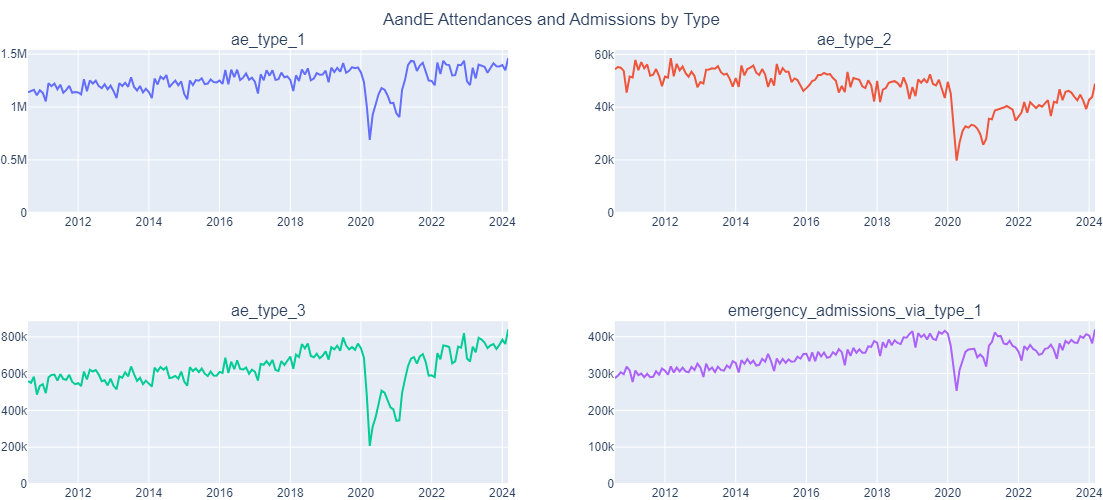

In [23]:
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['ae_type_1', # proper subplot title as a list to match the trace positions
                                    'ae_type_2', 
                                    'ae_type_3', 
                                    'emergency_admissions_via_type_1'])

# define the traces in order
traces = ['ae_type_1', 'ae_type_2', 'ae_type_3', 'emergency_admissions_via_type_1']

# define their respective positions for the subplot
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

# add traces to the respective subplots using the defined lists
for trace, pos in zip(traces, positions):
    fig.add_trace(go.Scatter(x=df['month'], y=df[trace], name=trace), row=pos[0], col=pos[1])

fig.update_layout(title='AandE Attendances and Admissions by Type',
                  title_x=0.5,
                  font=dict(family='Arial, monospace'),
                  showlegend=False,
                  width=900,
                  height=500,
                  margin=dict(b=0, t=50, l=0, r=0),
                  yaxis=dict(rangemode="tozero"),
                  yaxis2=dict(rangemode="tozero"),
                  yaxis3=dict(rangemode="tozero"),
                  yaxis4=dict(rangemode="tozero"),
              )

fig.show()

**Activity**

**Beginner**: Create a figure with two subplots - 1 row and 2 columns. <br> 
* One plot for `ae_type_1` and the other plot for `emergency_admissions_via_type_1`.

**Advanced**: Create a figure with six subplots - 3 rows and 3 columns. 
* The first column of subplots each showing the traces `ae_type_1`, `ae_type_2` and `ae_type_3`. 
* Then the second column of subplots showing traces `emergency_admissions_via_type_1`, `emergency_admissions_via_type_2`, `emergency_admissions_via_type_3_and_4`.

In [24]:
# Your code here



















### Tables

Plots can also be used to display tables of the raw data alongside your charts. <br>

The basic plot is set like this to read all the columns in the dataframe.
See [https://plotly.com/python/table/](https://plotly.com/python/table/) for more details.

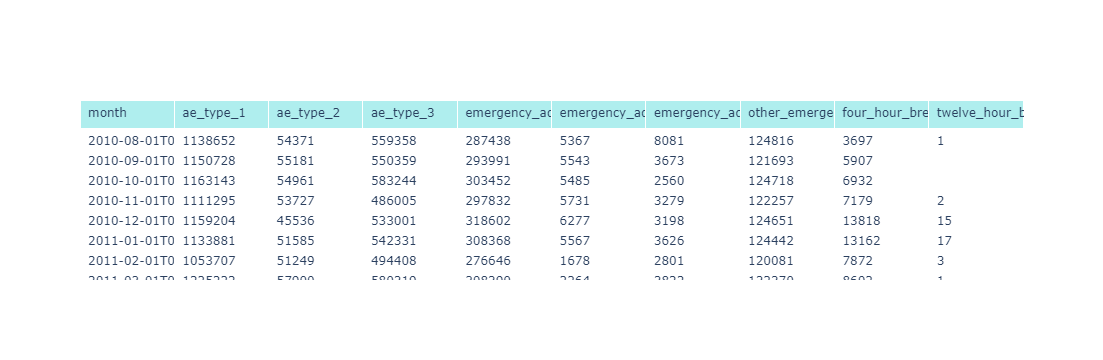

In [25]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='white',
               align='left'))
])

fig.show()

Instead of using the whole dataframe, we can specify certain columns.

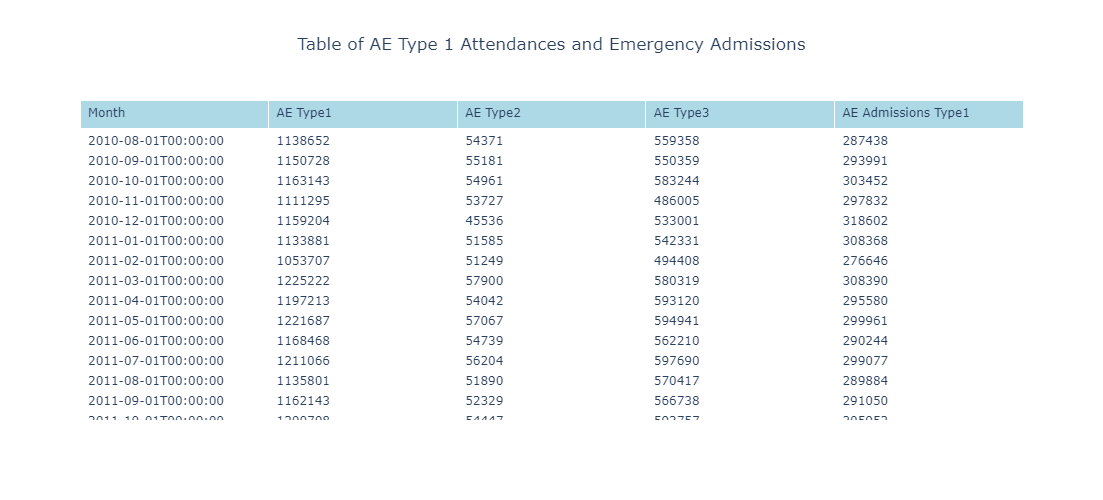

In [26]:
# Table figure
fig = go.Figure(data=[go.Table(
                header=dict(values=['Month', # selected columns for the header
                                    'AE Type1',
                                    'AE Type2',
                                    'AE Type3',
                                    'AE Admissions Type1'],
                            fill_color='lightblue',
                            align='left'),
                cells=dict(values=[df['month'], # selected columns for the values
                                   df['ae_type_1'],
                                   df['ae_type_2'], 
                                   df['ae_type_3'], 
                                   df['emergency_admissions_via_type_1']],
                           fill_color='white',
                           align='left'))
            ])

fig.update_layout(
    title='Table of AE Type 1 Attendances and Emergency Admissions',
    title_x=0.5,
    height=500,
    width=950
)

fig.show()

To make the output of the columns more readable, we may need to carry out some data formatting on the actual dataframe. <br>
* Dates to be formatted as dd/mm/yyyy.
* numerical columns to include a thousand separator.

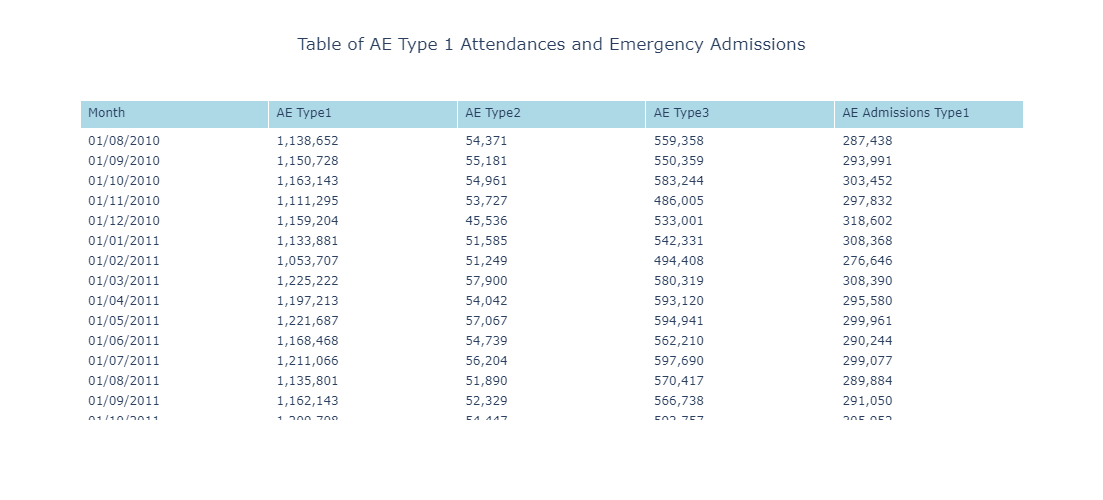

In [27]:
# format the date column to dd/mm/yyyy
df['formatted_month'] = pd.to_datetime(df['month']).dt.strftime('%d/%m/%Y')

# Change the format so that numerical columns have a thousand separator
df['formatted_ae_type_1'] = df['ae_type_1'].apply(lambda x: f"{x:,}")
df['formatted_ae_type_2'] = df['ae_type_2'].apply(lambda x: f"{x:,}")
df['formatted_ae_type_3'] = df['ae_type_3'].apply(lambda x: f"{x:,}")
df['formatted_emergency_admissions_via_type_1'] = df['emergency_admissions_via_type_1'].apply(lambda x: f"{x:,}")

fig = go.Figure(data=[go.Table(
                header=dict(values=['Month',
                                    'AE Type1',
                                    'AE Type2',
                                    'AE Type3',
                                    'AE Admissions Type1'],
                            fill_color='lightblue',
#                             line_color='darkslategray',
                            align='left'),
                cells=dict(values=[df['formatted_month'], 
                                   df['formatted_ae_type_1'],
                                   df['formatted_ae_type_2'], 
                                   df['formatted_ae_type_3'], 
                                   df['formatted_emergency_admissions_via_type_1']],
                           fill_color='white',
#                            line_color='darkslategray',
                           align='left'))
            ])

fig.update_layout(
    title='Table of AE Type 1 Attendances and Emergency Admissions',
    title_x=0.5,
    height=500,
    width=950
)

fig.show()

Changing the height of the overall figure ultimately changes the number of visible rows displayed.<br>
Font and border colours can also be easily changed.

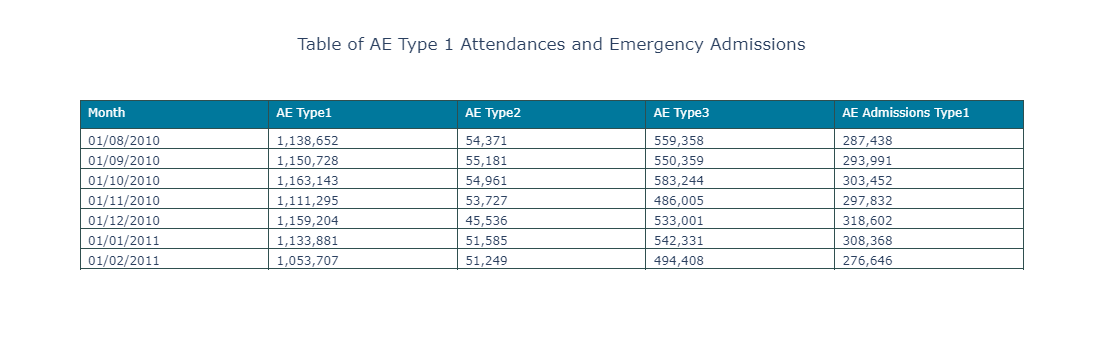

In [28]:
# format the date column to dd/mm/yyyy
df['formatted_month'] = pd.to_datetime(df['month']).dt.strftime('%d/%m/%Y')

# Change the format so that numerical columns have a thousand separator
df['formatted_ae_type_1'] = df['ae_type_1'].apply(lambda x: f"{x:,}")
df['formatted_ae_type_2'] = df['ae_type_2'].apply(lambda x: f"{x:,}")
df['formatted_ae_type_3'] = df['ae_type_3'].apply(lambda x: f"{x:,}")
df['formatted_emergency_admissions_via_type_1'] = df['emergency_admissions_via_type_1'].apply(lambda x: f"{x:,}")

fig = go.Figure(data=[go.Table(
                header=dict(values=['Month',
                                    'AE Type1',
                                    'AE Type2',
                                    'AE Type3',
                                    'AE Admissions Type1'],
                            fill_color='#00789c', # set the fill colour to a darker blue
                            font_color='#ffffff', # change the font to white
                            line_color='darkslategray', # adding line border colour to the header
                            align='left'),
                cells=dict(values=[df['formatted_month'], 
                                   df['formatted_ae_type_1'],
                                   df['formatted_ae_type_2'], 
                                   df['formatted_ae_type_3'], 
                                   df['formatted_emergency_admissions_via_type_1']],
                           fill_color='white',
                           line_color='darkslategray', # adding line border colour to the body
                           align='left'))
            ])

fig.update_layout(
    title='Table of AE Type 1 Attendances and Emergency Admissions',
    title_x=0.5,
    height=350, # changing the height of the figure will change the number of visible rows.
    width=950
)

fig.show()


**Activity**:

Inspect the dataframe and create a table using four different columns from what we have been working with. <br>
Format the data as appropriate, and style the table.

In [29]:
# Your code here















### Geospatial Plotting

Use when visualising and analyzing data that has a geographical or spatial component.

**HexBin**

We can plot geospatial data is to use a hexbin plot when we have latitude and longitude data. <br>
For this we need to import a new plotly package called `plotly.figure_factory`. <br>
```python
# import figure factory with the conventional alias of ff
import plotly.figure_factory as ff
```
The `plotly.figure_factory` module contains dedicated functions for creating very specific types of plots.

Read the Excel file containing latitude and longitude data for Somerset. <br>
We are going to add some synthetic data, in this case a random number, to the dataset  in order to plot some values onto a hexbin plot.

In [30]:
# read in the Excel file
df_geo = pd.read_excel("data/lat_long.xlsx")

In [31]:
# add a random number
df_geo["n"] = df_geo.apply(lambda x: np.random.normal(0, 0.1, 1).item(), axis=1)

In [32]:
# our synthetic dataset
df_geo.head(5)

lsoa  Longitude_1m  Latitude_1m         n
0  E01029028     -2.510712    51.143863 -0.050931
1  E01029032     -2.324633    51.241551  0.191285
2  E01029037     -2.330884    51.222363 -0.157155
3  E01029038     -2.320693    51.220853  0.002244
4  E01029053     -2.426655    51.244343 -0.001613

To build up the plot we use `ff.create_hexbin_mapbox`. <br>Further documentation on hexbin plotting can be found here: [https://plotly.com/python/hexbin-mapbox/](https://plotly.com/python/hexbin-mapbox/).

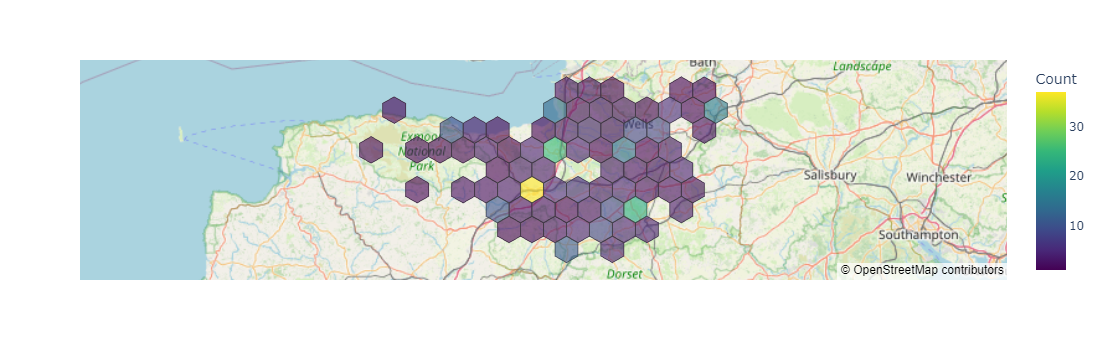

In [33]:
fig = ff.create_hexbin_mapbox(
    data_frame=df_geo, lat="Latitude_1m", lon="Longitude_1m", # dataframe and latitude and longitude columns
    nx_hexagon=15, # size of the hexbins
    opacity=0.6, # opacity value
    labels={"color": "Count"}, # labels for the colours
    mapbox_style='open-street-map', # use open-street-map for the map style
    min_count=1, # the minimum number of values used to show the hexbin
    color_continuous_scale='viridis', # colour palette
)

fig.show()

The plot is fully interactive and enabling to zoom in and out on sections of interest.<br> <br>


As with graph objects we can update the figure layout with a title and change the size of the figure etc.<br>
There are other types of map styles that are available: [https://plotly.com/python/mapbox-layers/](https://plotly.com/python/mapbox-layers/)

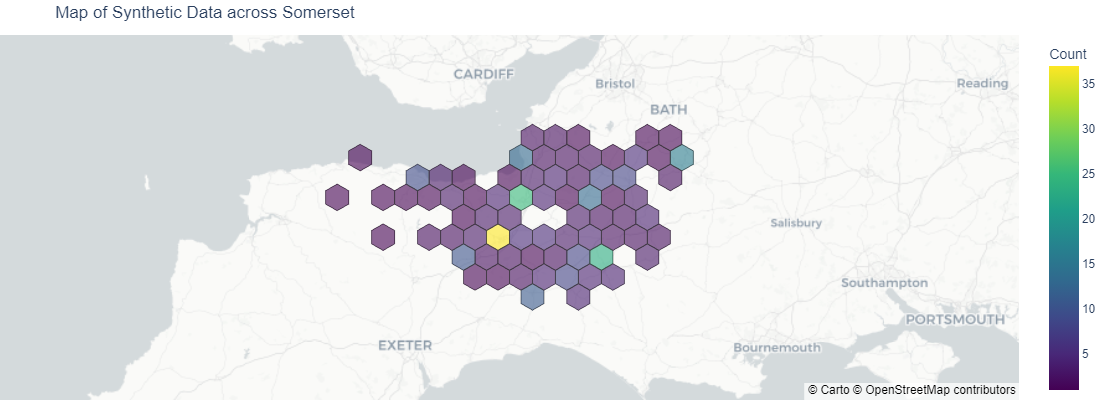

In [34]:
fig = ff.create_hexbin_mapbox(
    data_frame=df_geo, lat="Latitude_1m", lon="Longitude_1m", 
    nx_hexagon=15, 
    opacity=0.6, 
    labels={"color": "Count"}, 
    mapbox_style='carto-positron', # change the map style
    min_count=1, 
    color_continuous_scale='viridis', 
)

# update the layout and size of the figure
fig.update_layout(title='Map of Synthetic Data across Somerset',
                  font=dict(family='Arial, monospace'),
                  width=700,
                  height=400,
                  margin=dict(b=0, t=35, l=0, r=0),
                  )

fig.show()

Currently, the map is just plotting a count of the values per latitude and longitude. <br>
To use the synthetic data column of 'n' in the dataframe, we can specify the `color` and an `agg_func` that will aggregate the values.

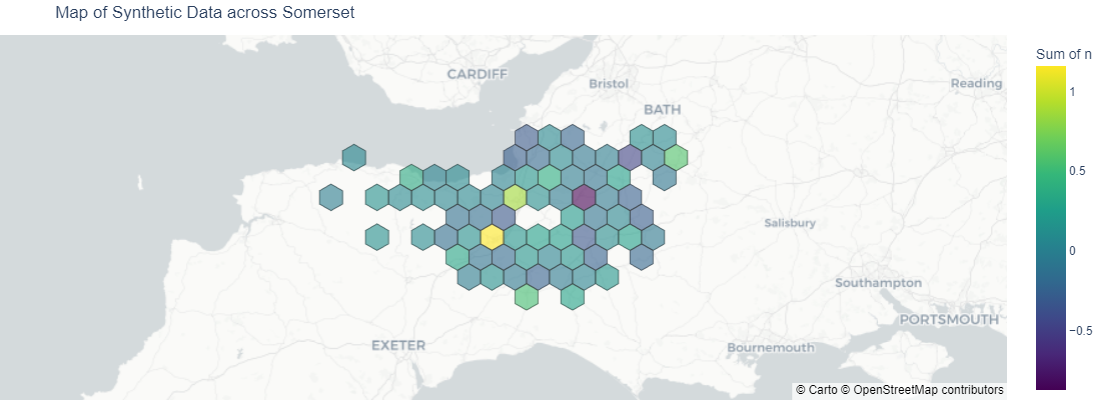

In [35]:
fig = ff.create_hexbin_mapbox(
    data_frame=df_geo, lat="Latitude_1m", lon="Longitude_1m",
    nx_hexagon=15,
    opacity=0.6,
    color="n", # reference the column that is to be represented by the colour
    agg_func=np.sum, # sum the data
    labels={"color": "Sum of n"}, # change the label on the colour scale
    mapbox_style='carto-positron', 
    min_count=1, 
    color_continuous_scale='viridis',
)

fig.update_layout(title='Map of Synthetic Data across Somerset',
                  font=dict(family='Arial, monospace'),
                  width=700,
                  height=400,
                  margin=dict(b=0, t=35, l=0, r=0),
                  )

fig.show()

**Activity**:

Using the plotly documentation, add the individual data points to the graph and adjust the colour scale to align with your visual vocabulory document. What are the risks of adding individual data points?

[https://plotly.com/python/builtin-colorscales/](https://plotly.com/python/builtin-colorscales/)

[https://plotly.com/python/](https://plotly.com/python/)


In [36]:
# Your code here














### Capstone Activity - Graph Objects

Waterfall plots are a powerful way to show changes over a time series, they show the addition and subtraction of records by data point.  

Create a Waterfall plot of AE Type one attendances, here is what it should look like (but make sure you format it in your style!)

**hint**: you will need to use the shift function in pandas to format the data correctly <br>

![alt text](pictures/waterfall.png "Waterfall Plot - Activity")